Heatmap

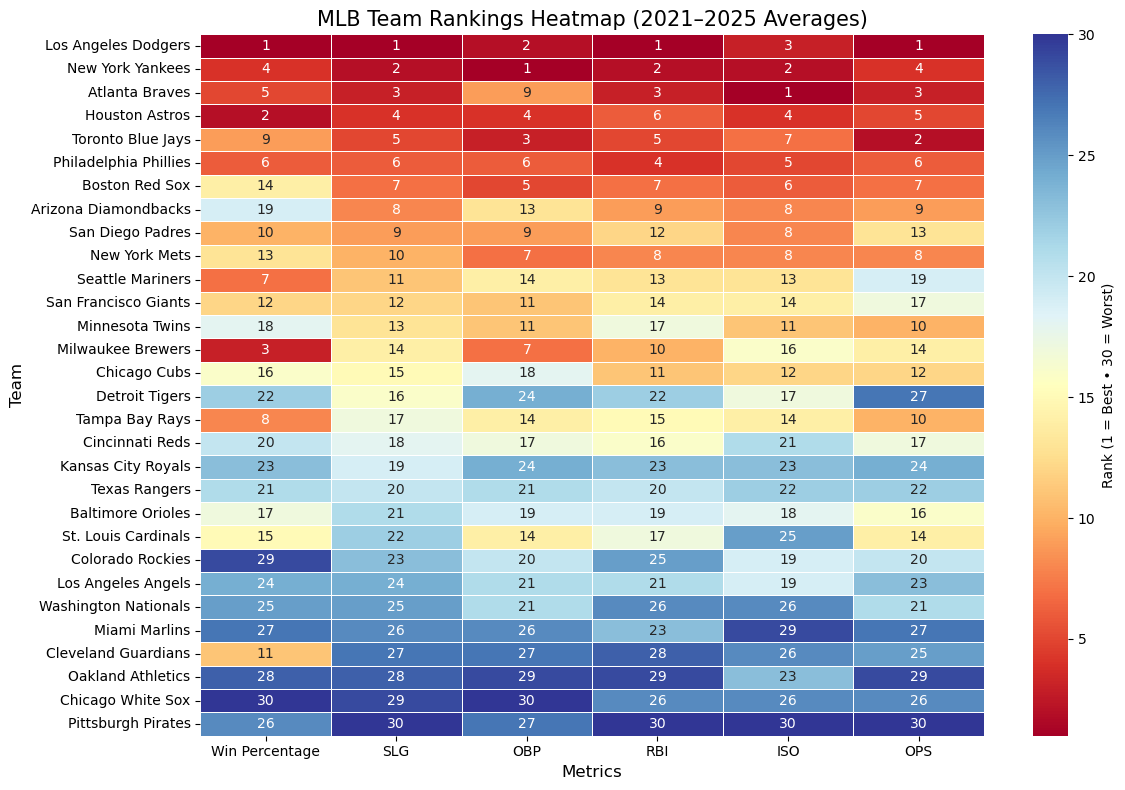

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Folders and file paths
# -----------------------------
data_folder = "../data"
output_folder = "../output"
os.makedirs(output_folder, exist_ok=True)

team_file = os.path.join(data_folder, "MLB team stats 2021-2025.csv")
heatmap_file = os.path.join(output_folder, "heatmap_team_rankings.png")

# -----------------------------
# Load team data
# -----------------------------
df = pd.read_csv(team_file)

# -----------------------------
# Stats to rank
# -----------------------------
stat_cols = [
    "Win%",
    "Avg. SLG (2021-2025)",
    "Avg. OBP (2021-2025)",
    "Avg. RBI (2021-2025)",
    "Avg. ISO (2021-2025)",
    "Avg. OPS (2021-2025)"
]

# Professional display names
display_names = {
    "Win%": "Win Percentage",
    "Avg. SLG (2021-2025)": "SLG",
    "Avg. OBP (2021-2025)": "OBP",
    "Avg. RBI (2021-2025)": "RBI",
    "Avg. ISO (2021-2025)": "ISO",
    "Avg. OPS (2021-2025)": "OPS"
}

# -----------------------------
# Rank each stat (1 = best, 30 = worst)
# -----------------------------
for col in stat_cols:
    df[col + " Rank"] = df[col].rank(ascending=False, method="min").astype(int)

rank_cols = [col + " Rank" for col in stat_cols]
rank_df = df.set_index("Team")[rank_cols]

# Rename columns for professional display
rank_df.rename(columns={col+" Rank": display_names[col] for col in stat_cols}, inplace=True)

# -----------------------------
# Heatmap
# -----------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(
    rank_df,
    cmap="RdYlBu",      # Rank 1 = red (best), 30 = blue (worst)
    annot=True,
    fmt="d",
    linewidths=0.5,
    vmin=1,
    vmax=30,
    cbar_kws={"label": "Rank (1 = Best • 30 = Worst)"}
)

plt.title("MLB Team Rankings Heatmap (2021–2025 Averages)", fontsize=15)
plt.ylabel("Team", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.tight_layout()

# -----------------------------
# Save heatmap to PNG
# -----------------------------
plt.savefig(heatmap_file, dpi=100, bbox_inches='tight')
plt.show()